## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [5]:
def sample_cards(N, n, k, Type=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=Type)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [61]:
cards = sample_cards(100, 6, 3)
cards

array([[ 16,  54,  75],
       [ 21,  81,  93],
       [  1,   9, 100],
       [ 14,  39,  67],
       [  2,  63,  71],
       [ 36,  61,  77]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([14, 70, 82]), array([ 3, 30, 40]))

The lowest card in the game is

In [5]:
np.min(cards)

1

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

<function matplotlib.pyplot.show(close=None, block=None)>

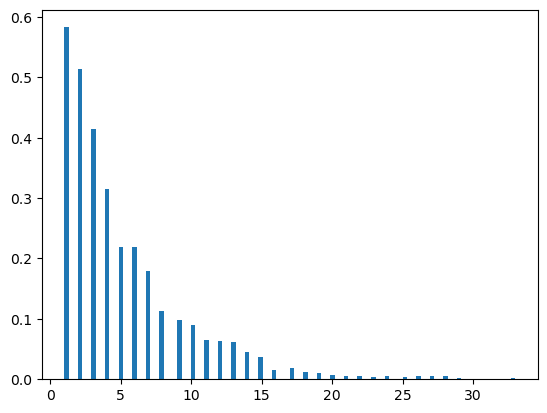

In [7]:
plt.hist([np.min(sample_cards(100,6,3)) for i in range(2000)],bins=100,density=True)
plt.show

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

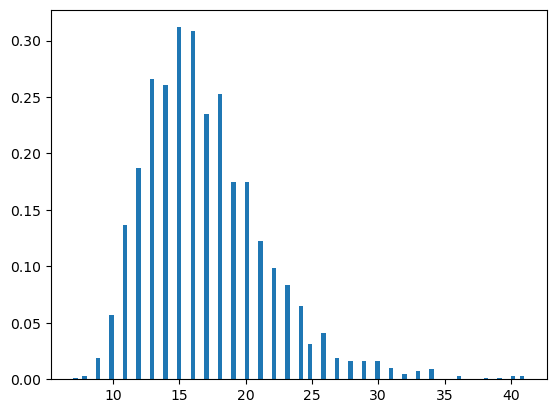

In [33]:
N=100
n=6
k=3
times = 2000

def largest_gap(N,n,k,times, plot=True):
    result = [np.max(np.diff(np.sort(sample_cards(N,n,k).reshape(1,n*k)[0]))) for i in range(times)]
    if plot:
        plt.hist(result,bins=N, density=True)
    return result

a = largest_gap(N,n,k,times)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

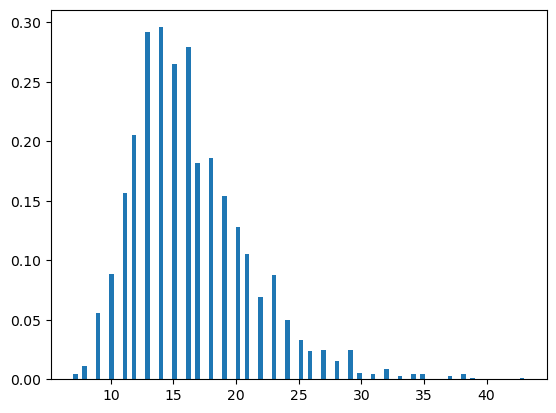

In [34]:
N=100
n=6
k=3
times = 2000

def largest_gap_diff(N,n,k,times, plot=True):
    result = []
    for j in range(times):
        order = [i for i,x in sorted(enumerate(sample_cards(N,n,k).reshape(1,n*k)[0]),key=lambda x:x[1])]
        num = np.diff([x for i,x in sorted(enumerate(sample_cards(N,n,k).reshape(1,n*k)[0]),key=lambda x:x[1])])
        space = 0
        for i in range(n*k-1):
            if (order[i]//3) == (order[i+1]//3):
                continue
            if num[i]>space:
                space = num[i]
        result.append(space)
    if plot:
        plt.hist(result,bins=N,density=True)
    return result

a = largest_gap_diff(N,n,k,times)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

The mean of the two distributions:
17.0048 16.3316


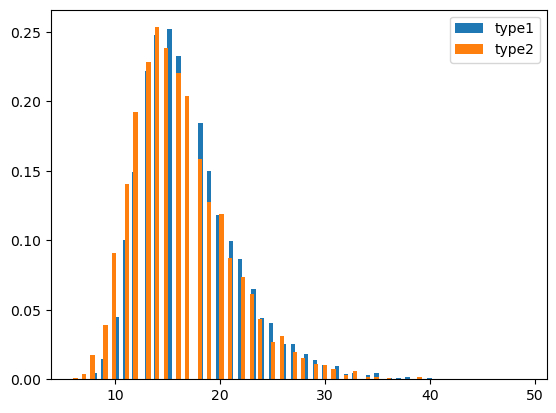

In [15]:
# compare the gaps from different simulations

N=100
n=6
k=3
times = 10000

a = largest_gap(N,n,k,times)
b = largest_gap_diff(N,n,k,times)
plt.legend(["type1","type2"])

print("The mean of the two distributions:")
print(np.mean(a),np.mean(b))

#### Conclusion: 
The first type of gap is larger than the second one. <br>
Restricting that the cards must be from different players will narraw the largest gap.

The mean of the two distributions:


(17.046, 16.4153)

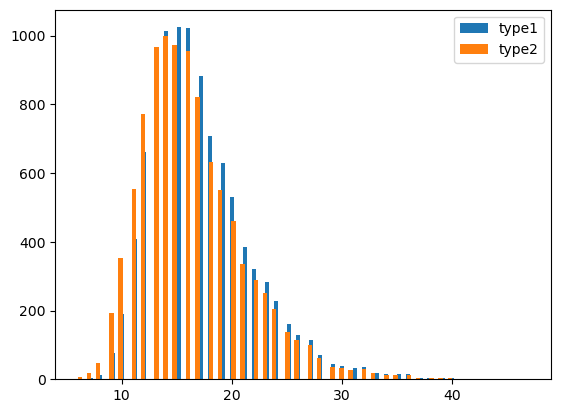

In [17]:
# compare the gaps from the same simulations

N=100
n=6
k=3
times = 10000

def largest_gap_compare(N,n,k,times):
    result1 = []
    result2 = []
    for i in range(times):
        data = sample_cards(N,n,k)
        result1.append(np.max(np.diff(np.sort(data.reshape(1,n*k)[0]))))
        order = [i for i,x in sorted(enumerate(data.reshape(1,n*k)[0]),key=lambda x:x[1])]
        num = np.diff([x for i,x in sorted(enumerate(data.reshape(1,n*k)[0]),key=lambda x:x[1])])
        space = 0
        for j in range(n*k-1):
            if (order[j]//3) == (order[j+1]//3):
                continue
            if num[j]>space:
                space = num[j]
        result2.append(space)

    plt.hist(result1,bins=N)
    plt.hist(result2,bins=N)

    
    return result1,result2,np.mean(result1),np.mean(result2)

a = largest_gap_compare(N,n,k,times)
plt.legend(["type1","type2"])
# the means
print("The mean of the two distributions:")
a[2:]

Text(0, 0.5, 'G2')

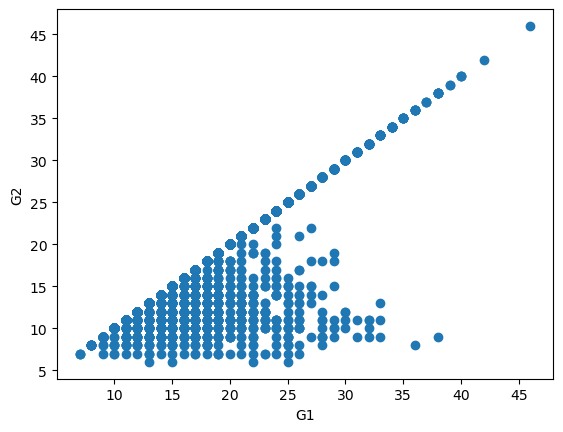

In [17]:
plt.scatter(a[0],a[1])
plt.xlabel("G1")
plt.ylabel("G2")
# Conclusion: the first type of gap is larger than the second one

#### Conclusion: 
The first type of gap is larger than the second one. <br>
Restricting that the cards must be from different players will narraw the largest gap.

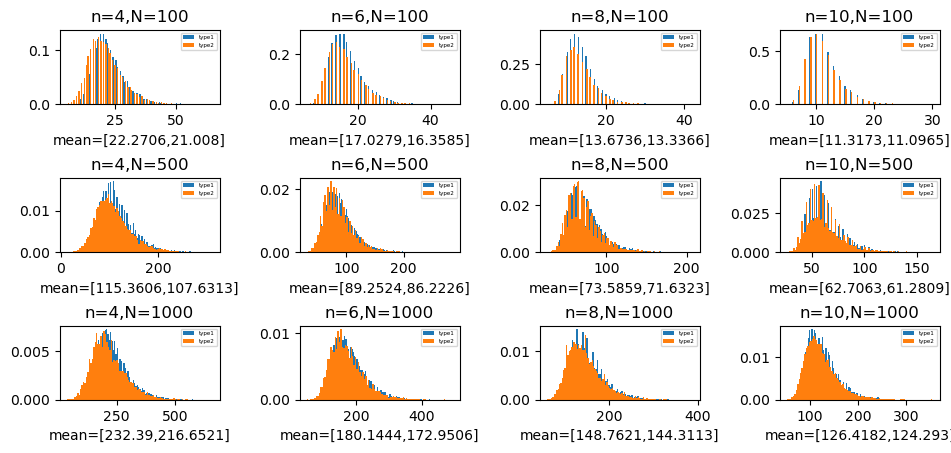

In [54]:
# change n and N

# different simulation
k=3
times = 10000

n = [4,6,8,10]
N = [100,500,1000]
fig, axs = plt.subplots(len(N),len(n))

for row, j in enumerate(N):
    for col,i in enumerate(n):
        a = largest_gap(j,i,k,times,plot=False)
        b = largest_gap_diff(j,i,k,times,plot=False)
        axs[row,col].hist(a,bins=100,density=True)
        axs[row,col].hist(b,bins=100,density=True)
        axs[row,col].legend(["type1","type2"],fontsize="4")
        axs[row,col].set_title("n={},N={}".format(i,j))
        axs[row,col].set_xlabel("mean=[{},{}]".format(np.mean(a),np.mean(b)))
plt.subplots_adjust(right=1.5,wspace=0.5,hspace=1)

#### Conclusion: 
As N grows larger, the difference between the two types of sampling is larger. The larger the sample space is, the larger the largest gap between cards is.
When n is larger, the difference of the means of the two distributions is smaller. When there are more players, the probability that the two consecutive cards are from the same player is smaller, so the difference of the largest gaps is smaller.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

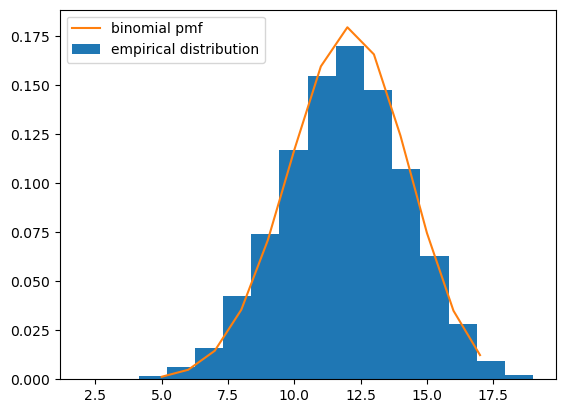

In [65]:
import scipy.stats

p = 0.6
n = 20
times=10000

# use the card game
def sample_game(n,p,times=1):
    result=[]
    for i in range(times):
        tmp = (sample_cards(100,1,n,Type=True).reshape(1,n)[0] < p*100).astype(int)
        result.append(sum(tmp))
    return result

plt.hist(sample_game(n,p,times),bins=16,density=True)

# draw the true pmf
x = np.arange(scipy.stats.binom.ppf(0.001, n, p),
              scipy.stats.binom.ppf(0.999, n, p))
y = scipy.stats.binom.pmf(x, n, p)
plt.plot(x,y)
plt.legend(["binomial pmf","empirical distribution"])

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

$\frac{X_{min}}{N} \sim Beta(1,nk)$
(when $N \rightarrow \infty$) 

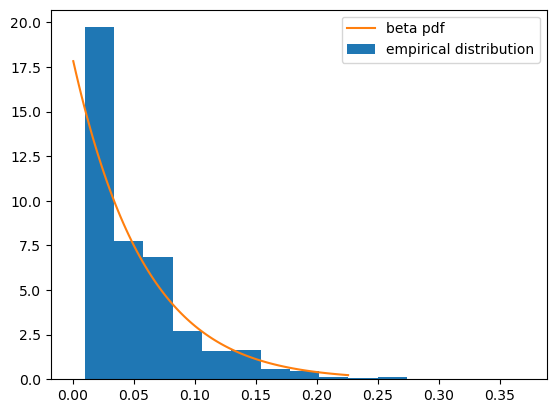

In [73]:
N=100
n=6
k=3
times=2000

# card game
plt.hist(np.array([np.min(sample_cards(N,n,k)) for i in range(times)])/N,bins=15,density=True)

# beta pdf
x = np.linspace(stats.beta.ppf(0.01, 1, n*k),
                stats.beta.ppf(0.99, 1, n*k), 100)
y = stats.beta.pdf(x,1,n*k)
plt.plot(x,y)

plt.legend(["beta pdf","empirical distribution"])

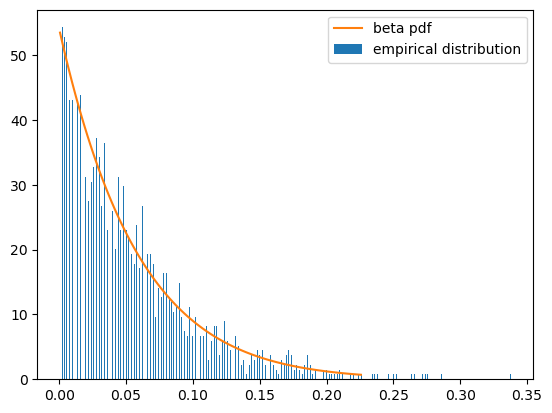

In [76]:
N=500
n=6
k=3
times=2000

plt.hist(np.array([np.min(sample_cards(N,n,k)) for i in range(times)])/N,bins=500,density=True)
#plt.hist(np.random.beta(1, n*k, size=times)*N,bins=N)
# use round to make the data same
x = np.linspace(stats.beta.ppf(0.01, 1, n*k),
                stats.beta.ppf(0.99, 1, n*k), 100)
y = stats.beta.pdf(x,1,n*k)*3
plt.plot(x,y)
plt.legend(["beta pdf","empirical distribution"])

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

$1 - \frac{X_{min}}{N} \sim Beta(nk,1)$ <br>
$ -ln(1-\frac{X_{min}}{N}) \sim Exp(nk)$ <br>
(when $N \rightarrow \infty$) 

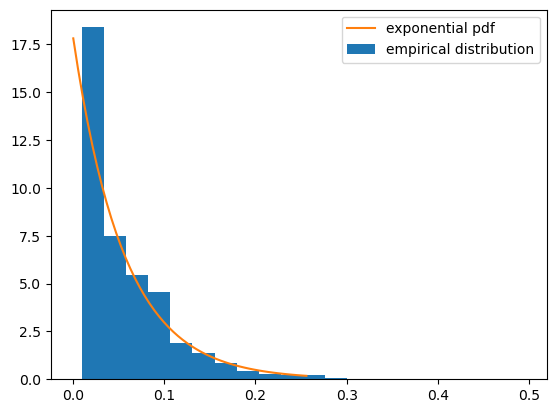

In [78]:
N=100
n=6
k=3
times=2000

U1 = np.array([np.min(sample_cards(N,n,k)) for i in range(times)])
X = -np.log(1 - U1/N)

plt.hist(X,bins=20,density=True)

# exponential distribution
x = np.linspace(stats.expon.ppf(0.01, scale=1/(n*k)),
                stats.expon.ppf(0.99, scale=1/(n*k)))
y = stats.expon.pdf(x, scale=1/(n*k))
plt.plot(x,y)
plt.legend(["exponential pdf","empirical distribution"])

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [6]:
def sample_cards(N, n, k, Type=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - Type : With or wihout reposition
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=Type)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

In [34]:
def change_N(N,n,k,times, pdf=True):
    a = [np.min(sample_cards(N,n,k,Type=False)) for i in range(times)]
    b = [np.min(sample_cards(N,n,k,Type=True)) for i in range(times)]

    if not pdf:
        bins = 20
    else: bins = int(N/10)

    plt.hist(np.array(b)/N,bins=bins,density=True)
    plt.hist(np.array(a)/N,bins=bins,density=True)

    if pdf:
        x = np.linspace(stats.beta.ppf(0.01, 1, n*k),
                    stats.beta.ppf(0.99, 1, n*k), 100)
        y = stats.beta.pdf(x,1,n*k)
        plt.plot(x,y)
        plt.legend(["pdf","with rp","without rp"])
    else:
        plt.legend(["with rp","without rp"])

    return [np.mean(a),np.mean(b)]

mean of the two distributions:


[1.616, 2.147]

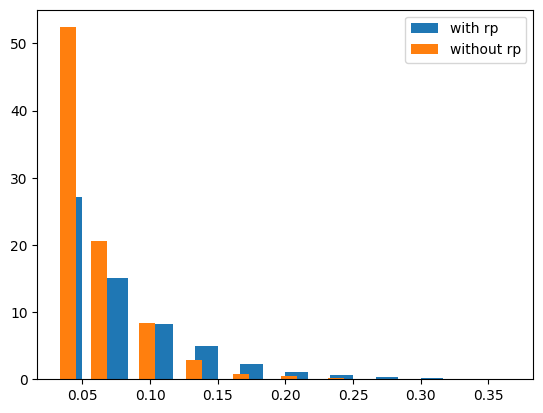

In [35]:
N=30
n=6
k=3
times = 2000

print("mean of the two distributions:")
change_N(N,n,k,times,pdf=False)

#### When $N$ is small, the difference between sampling with replacement and without replacement is significant.

mean of the two distributions:


[5.317, 5.8445]

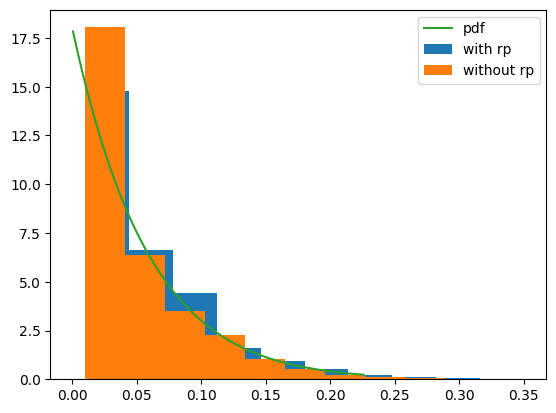

In [36]:
N=100
n=6
k=3
times = 2000

print("mean of the two distributions:")
change_N(N,n,k,times)

#### As $N$ goes larger, the difference between the two types of sampling is smaller, and the distribution of the card numbers is closer to the beta distribution.

mean of the two distributions:


[50.466, 53.7995]

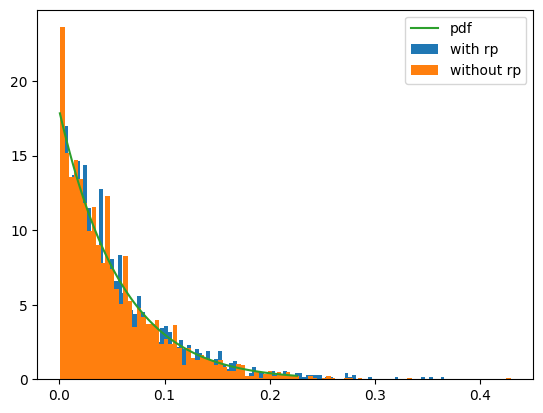

In [37]:
N=1000
n=6
k=3
times = 2000

print("mean of the two distributions:")
change_N(N,n,k,times)

#### When $N >> n*k$, sampling with or without replacement are almost the same, and the distribution of the card numbers is very close to the true PDF of beta distribution.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Fangyuan Li (FayeL6)
- Member No2: 
- Member No3: